# DSCI 100 FINAL PROJECT #
#### By Shamel, Mochammad, Emma, Jiaxie

### ARE AGE AND HOURS PLAYED DETERMINERS OF SUBSCRIPTION STATUS?

This is a final project for introduction for data science course in UBC vancouver campus. For this project, each assigned group was given data collected from a research project regarding a minecraft server run by a from UBC club. The data collected record the player information as well as the play sessions of each player in the minecraft research server.
The goal of this project is to look for meaningful data and answer some exploratory questions regarding the minecraft research server and player data. Our group decided to explore and try to answer one of the 3 given broad questions, that is “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?”.


The following is our process to answer the stated question from making a more specific aspect we want to explore, loading and wrangling the data, making visualizations, and finally came to our conclusion. 

The specific question we are trying to answer is:
### Can we predict a player's likelihood to subscribe to the server based on age and hours played on a minecraft server in the players.csv data set?

Hours played and age act as meaningful and accurate predictors for this specific question as more hours played indicates a higher level of commitment to the game and age can determine the amount of time and money you have available to be able to commit to the server. 

## Methods and Results

### Library Import
Here, we add the libraries that will help make our program:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Loading Dataset

Here, we load the dataset using the url attained from the Github Repository:

In [2]:
players_url <- "https://raw.githubusercontent.com/ShamelessRake/DSCI-100-Project-005-039/refs/heads/main/players.csv"

players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Wrangling Data

While the data seems pretty clean, we could still benefit from removing unwanted variables, altering datatypes, lowercasing the A in "Age" for consistency, and removing NA values. We will only need the subscribe, age, and played_hours variable:

In [3]:
sub_time_age_df <- players |>
    select(subscribe, played_hours, Age) |>
    rename("age" = Age) |>
    mutate(subscribe = fct_recode(as.factor(subscribe), "subscribed" = "TRUE", "Not subscribed" = "FALSE")) |>
    drop_na()
head(sub_time_age_df)

subscribe,played_hours,age
<fct>,<dbl>,<dbl>
subscribed,30.3,9
subscribed,3.8,17
Not subscribed,0.0,17
subscribed,0.7,21
subscribed,0.1,21
subscribed,0.0,17


### Summarizing Data
It is important to know what data we're working with here, so some summarization regarding the maximum values, the minimum values, the mean, the standard deviations. Additionally, we should also find out how many people are subscribed and how many aren't.

In [29]:
max_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(max, na.rm = TRUE) |>
    rename("most_hours_played" = played_hours, "oldest" = age)

min_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(min, na.rm = TRUE) |>
    rename("minimum_hours_played" = played_hours, "youngest" = age)

mean_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(mean, na.rm = TRUE) |>
    rename("average_hours_played" = played_hours, "average_age" = age)

sd_age_time <- sub_time_age_df |>
    select(played_hours, age) |>
    map_df(sd, na.rm = TRUE) |>
    rename("sd_hours_played" = played_hours, "sd_age" = age)

num_subscribed_and_unsubscribed <- sub_time_age_df |>
    select(subscribe) |>
    group_by(subscribe) |>
    summarize(count = n())

max_age_time
min_age_time
mean_age_time
sd_age_time
num_subscribed_and_unsubscribed

most_hours_played,oldest
<dbl>,<dbl>
223.1,50


minimum_hours_played,youngest
<dbl>,<dbl>
0,8


average_hours_played,average_age
<dbl>,<dbl>
5.904639,20.52062


sd_hours_played,sd_age
<dbl>,<dbl>
28.49793,6.174667


subscribe,count
<fct>,<int>
Not subscribed,52
subscribed,142


### Visualizing the Data
Let's take a look at the relationship of age (x-axis), hours played (y-axis), and subscription status (coloured).

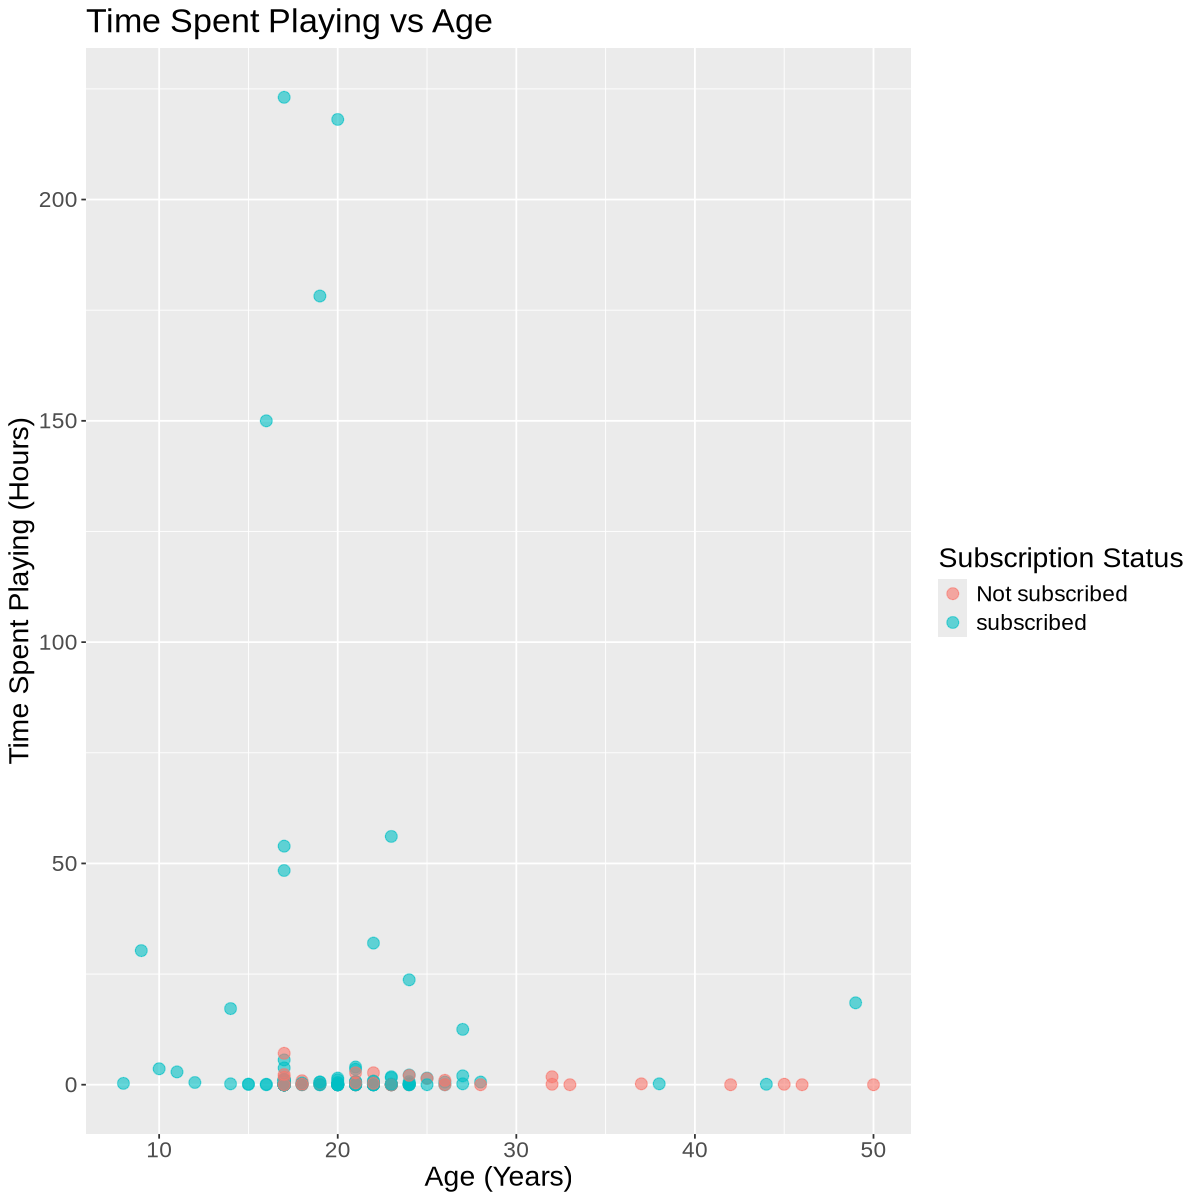

In [30]:
options(repr.plot.height = 10, repr.plot.width = 10)

plot_sub_time_age <-sub_time_age_df |>
    ggplot(aes(x = age, y = played_hours, color = subscribe)) +
    geom_point(size = 3, alpha = 0.6) +
    labs(x = "Age (Years)", y = "Time Spent Playing (Hours)", color = "Subscription Status", title = "Time Spent Playing vs Age") +
    theme(text = element_text(size = 17))
plot_sub_time_age

### Initial Observations
Nothing comes off very clearly as of now in indicating subscription status. There exist some spots where data seems to have points of subscription while other areas don't, such as those below the age of 17 being subscribed, and those above the age of 30 being not subscribed. There is still potential in finding patterns, but with eyes alone, we can't for sure spot a pattern.

### Creating the Training and Testing Split
Here, we split our data, allocating 75% of it to the training data, and the other 25% to the testing, a reasonable split that will give enough data to train the accuracy of our model, and test it.

In [6]:
set.seed(4321)

players_split <- initial_split(sub_time_age_df)
players_training <- training(players_split)
players_testing <- testing(players_split)

### Create and Train our K-Nearest Neighbor Classification Model

Now that we've done all the preliminary work, we can begin to work on actually training a K-Nearest Neighbor Classification Model that can potentially classify newly introduced data by learning from our previous data. To do this, we need to identify a proper K value that's computationally inexpensive, and offers high accuracy. Then, we need to establish a spec, a recipe, a range of K values for our cross validation to determine the most helpful K value, and a workflow. In the recipe, due to the class imbalance seen between subscribed and not subscribed, we will need to oversample to make up for it. For the cross validation, we'll make 5 fold cross.

neighbors,mean
<int>,<dbl>
64,0.6689655
65,0.6689655
63,0.6620690
⋮,⋮
80,0.4275862
83,0.4206897
84,0.4206897


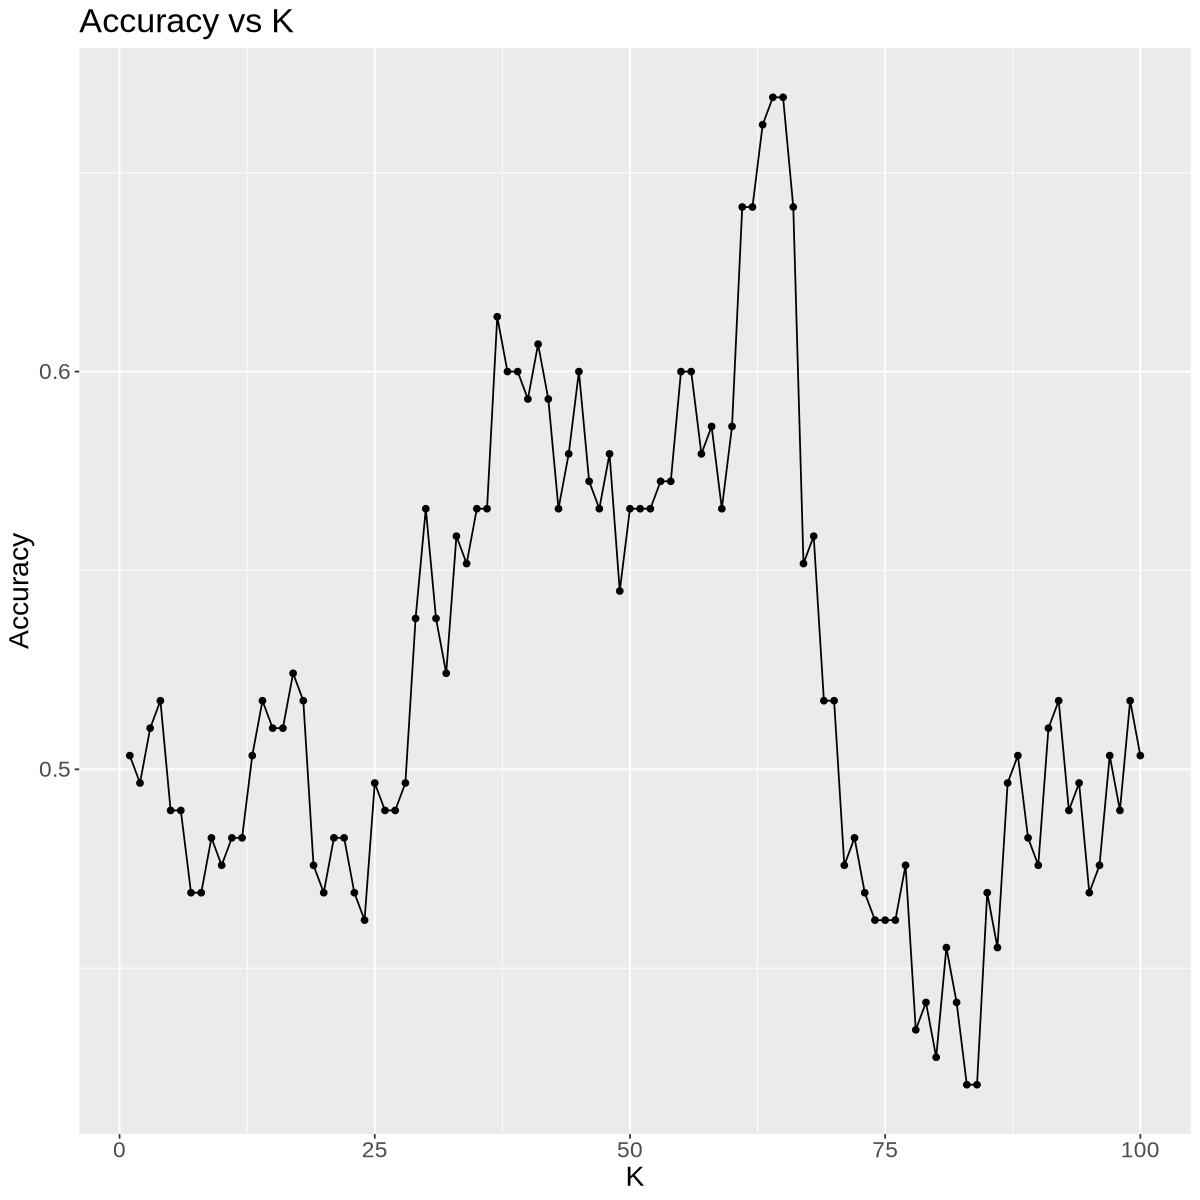

In [16]:
set.seed(4321)

k_grid <- tibble(neighbors = 1:100)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_recipe <- recipe(subscribe ~., data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(subscribe, over_ratio = 1, skip = TRUE)

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

players_fit <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe) |>
    tune_grid(resamples = players_vfold, grid = k_grid)

players_result <- players_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))

plot_accuracy <- ggplot(players_result, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K", y = "Accuracy", title = "Accuracy vs K") +
    theme(text = element_text(size = 17))
plot_accuracy
players_result

From what we can see, it appears that **64** offers the best K value for the Nearest Neighbor algorithm. The problem with this is that the K value is very high, so it would computationally expensive. Additionally, it very quickly dips in accuracy with the values surrounding it. Therefore, we can look at someting below K= 20. the greatest peak we have is at **K = 17** This value is relatively small so it will be computationally inexpensive. Additionally, the surrounding values appear pretty high as well to it, with much less drastic drops than 64. HOWEVER, it should be noted that the K values exist in accuracy range of 0.1, so maybe multiple K values are possibly. Because of this, it doesn't really make sense to use a K value that large when a much smaller one can give decently similar results. Therefore, we will use **K = 4**. This is very computationally inexpensive, and doesn't have the K's surrounding it deviate too much.

### Creating and Testing the Classifier
Now that we've decided the K = 4 is our classifier, we will make use that K-nearest neighbor value to test how accurate our classification model is. Additionally, we will test the recall, precision, as well as see how many false positives and negatives we got, along with true positives and negatives.

In [25]:
players_spec_known_k <- nearest_neighbor(weight_func = "rectangular", neighbor = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

players_final_fit <- workflow() |>
    add_model(players_spec_known_k) |>
    add_recipe(players_recipe) |>
    fit(players_training)

prediction_players <- players_final_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

player_accuracy <- prediction_players |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

event_levels_config <- prediction_players |> pull(subscribe) |> levels()

player_recall <- prediction_players |>
    recall(truth =subscribe, estimate = .pred_class, event_levels = "first")

player_precision <- prediction_players |>
    precision(truth =subscribe, estimate = .pred_class, event_levels = "first")

player_conf_mat <- prediction_players |>
     conf_mat(truth = subscribe, estimate = .pred_class)

player_metrics <- tibble(
    accuracy = player_accuracy |> select(.estimate) |> pull(),
    recall = player_recall |> select(.estimate) |> pull(),
    precision = player_precision |> select(.estimate) |> pull()
                        )

prediction_players
event_levels_config
player_conf_mat
player_metrics

.pred_class,subscribe,played_hours,age
<fct>,<fct>,<dbl>,<dbl>
Not subscribed,Not subscribed,0.0,17
subscribed,subscribed,0.0,19
Not subscribed,subscribed,0.1,17
⋮,⋮,⋮,⋮
Not subscribed,subscribed,0.0,17
subscribed,Not subscribed,0.3,22
Not subscribed,Not subscribed,0.0,17


[1] "Not subscribed" "subscribed"

                Truth
Prediction       Not subscribed subscribed
  Not subscribed             14         19
  subscribed                  3         13

accuracy,recall,precision
<dbl>,<dbl>,<dbl>
0.5510204,0.8235294,0.4242424


### Discussion On Accuracy, Precision, Recall, and Confusion Matrix